In [1]:
import pandas as pd

In [2]:
df_identity = pd.read_csv('/Users/mpessini/Desktop/Ponderada_Marcelo/PonderadaSemana7/Data/train_identity.csv')
df_transaction = pd.read_csv('/Users/mpessini/Desktop/Ponderada_Marcelo/PonderadaSemana7/Data/train_transaction.csv')
df_sample = pd.read_csv('/Users/mpessini/Desktop/Ponderada_Marcelo/PonderadaSemana7/Data/sample_submission.csv')

In [3]:
df_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [4]:
df_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_sample.head()

,TransactionID,isFraud
0,3663549,0.5
1,3663550,0.5
2,3663551,0.5
3,3663552,0.5
4,3663553,0.5


Merge nos dfs

In [6]:
# Merge the two dataframes on TransactionID
df_merged = df_transaction.merge(
    df_identity,
    on='TransactionID',
    how='left'   # or 'inner' if you only want rows present in both
)

# Check the result
print(df_merged.shape)
df_merged.head()


(590540, 434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [7]:
print(df_merged.shape)
print(df_merged.dtypes.value_counts())

# missing values (%)
missing = df_merged.isnull().mean().sort_values(ascending=False)
missing.head(20)

# target balance
df_merged['isFraud'].value_counts(normalize=True)

(590540, 434)
float64    399
object      31
int64        4
Name: count, dtype: int64


isFraud
0    0.96501
1    0.03499
Name: proportion, dtype: float64

In [8]:
num_cols = df_merged.select_dtypes(include='number').columns
df_merged[num_cols].describe().T.sort_values('mean').head(15)


,count,mean,std,min,25%,50%,75%,max
id_14,80044.0,-344.507146,93.695502,-660.0,-360.0,-300.0,-300.0,720.0
id_08,5155.0,-38.600388,26.084899,-100.0,-48.0,-34.0,-23.0,0.0
id_01,144233.0,-10.170502,14.347949,-100.0,-10.0,-5.0,-5.0,0.0
id_06,136865.0,-6.698710,16.491104,-100.0,-6.0,0.0,0.0,0.0
id_10,74926.0,-0.301124,2.789446,-100.0,0.0,0.0,0.0,0.0
id_04,66324.0,-0.058938,0.701015,-28.0,0.0,0.0,0.0,0.0
V68,513444.0,0.000534,0.023760,0.0,0.0,0.0,0.0,2.0
V27,514467.0,0.000776,0.028596,0.0,0.0,0.0,0.0,4.0
V28,514467.0,0.000830,0.031133,0.0,0.0,0.0,0.0,4.0
V89,501376.0,0.000902,0.031943,0.0,0.0,0.0,0.0,2.0


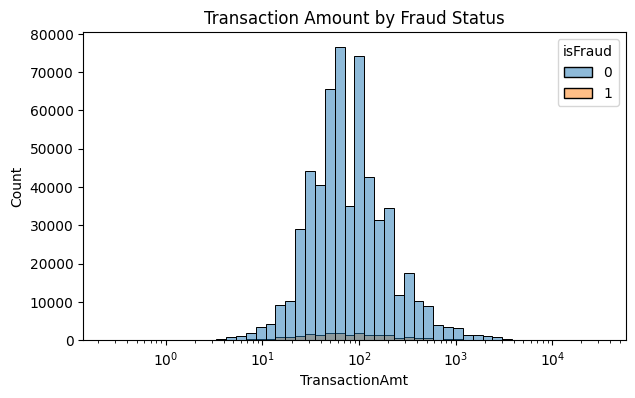

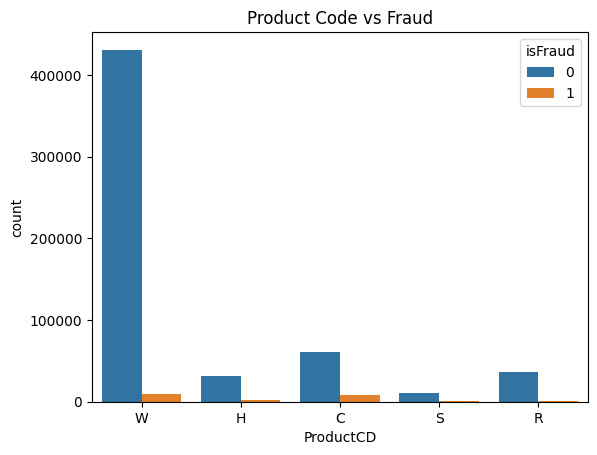

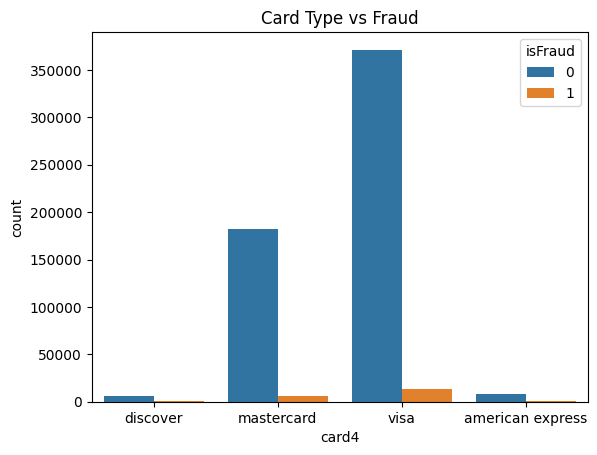

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.histplot(data=df_merged, x='TransactionAmt', hue='isFraud', log_scale=True, bins=50)
plt.title('Transaction Amount by Fraud Status')
plt.show()

sns.countplot(data=df_merged, x='ProductCD', hue='isFraud')
plt.title('Product Code vs Fraud')
plt.show()

sns.countplot(data=df_merged, x='card4', hue='isFraud')
plt.title('Card Type vs Fraud')
plt.show()


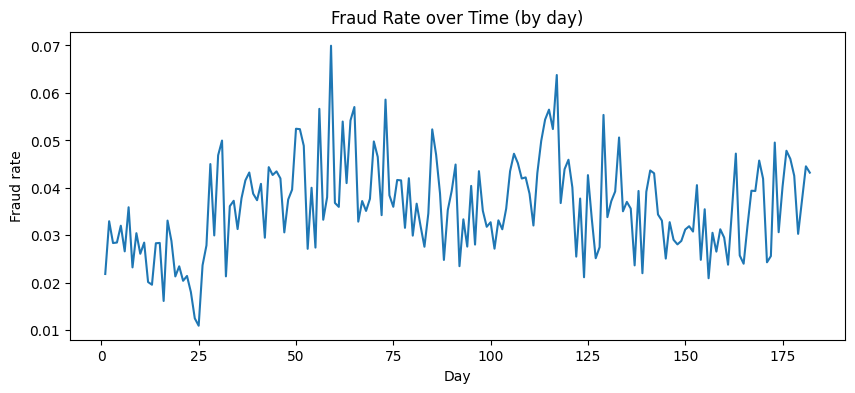

In [10]:
# convert TransactionDT (seconds from start) into days
df_merged['TransactionDay'] = (df_merged['TransactionDT'] / 86400).astype(int)

fraud_rate_by_day = df_merged.groupby('TransactionDay')['isFraud'].mean()

plt.figure(figsize=(10,4))
fraud_rate_by_day.plot()
plt.title('Fraud Rate over Time (by day)')
plt.xlabel('Day')
plt.ylabel('Fraud rate')
plt.show()


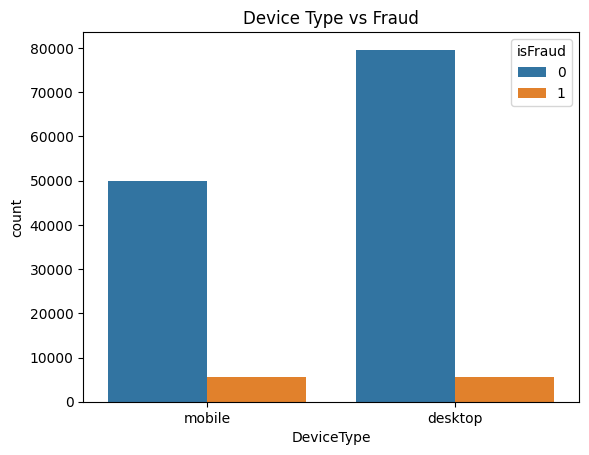

In [11]:
identity_cols = [c for c in df_merged.columns if c.startswith('id_')]
df_merged[identity_cols].isnull().mean().sort_values().head(10)

# Example: check device type distribution
sns.countplot(data=df_merged, x='DeviceType', hue='isFraud')
plt.title('Device Type vs Fraud')
plt.show()


Key Insights from Your Plots & Stats
1. Severe Class Imbalance

isFraud = 1 appears in only ~3.5% of transactions.

This means models will easily predict the majority class unless we handle the imbalance.

📌 Implication: evaluation metrics like accuracy will be misleading — we should use ROC-AUC, PR-AUC, recall@k, etc., and consider resampling or class weights.

2. Transaction Amount Distribution

Most transactions are between $10 and $500, with a log-normal distribution.

Fraud cases are not concentrated at extreme values — they appear scattered, though slightly more frequent around low/moderate amounts.

📌 Implication: amount alone is not a strong separator, but outlier detection combined with other features could help.

3. Product Code Patterns

Product W dominates the dataset (~75%), but has relatively lower fraud rates.

Products C and H have proportionally higher fraud incidence despite smaller counts.

📌 Implication: ProductCD may be a useful categorical feature, especially when combined with TransactionAmt.

4. Card Type Patterns

Most cards are visa and mastercard, but fraud percentage is visibly higher on visa.

discover and american express are rare, with few fraud cases.

📌 Implication: Card type itself has predictive power, but probably stronger when combined with card1–card6 numeric bins (card families).

5. Temporal Fraud Bursts

Fraud rate over time fluctuates heavily, from 1% to 7% spikes.

There are bursts around certain days (~60–70, ~120).

📌 Implication: Time-based features are key. You can engineer:

TransactionDay, TransactionHour

rolling-window features (fraud count in past N hours for same card/email/device)

6. Device Patterns

desktop has more total transactions, but fraud rates are very similar between desktop and mobile.

This suggests device alone is weak, but may be useful interacting with other features (e.g., rare device + high amount).

7. Identity Features Are Sparse but Informative

Most id_* features are very sparse (~15–25% non-null), but may contain risk scores or flags.

Some (id_14, id_08, id_01) have negative values, which could represent model scores.

📌 Implication: You should explore:

Null/not-null flags as binary features

Normalizing these id_* values

Checking which are highly correlated with fraud

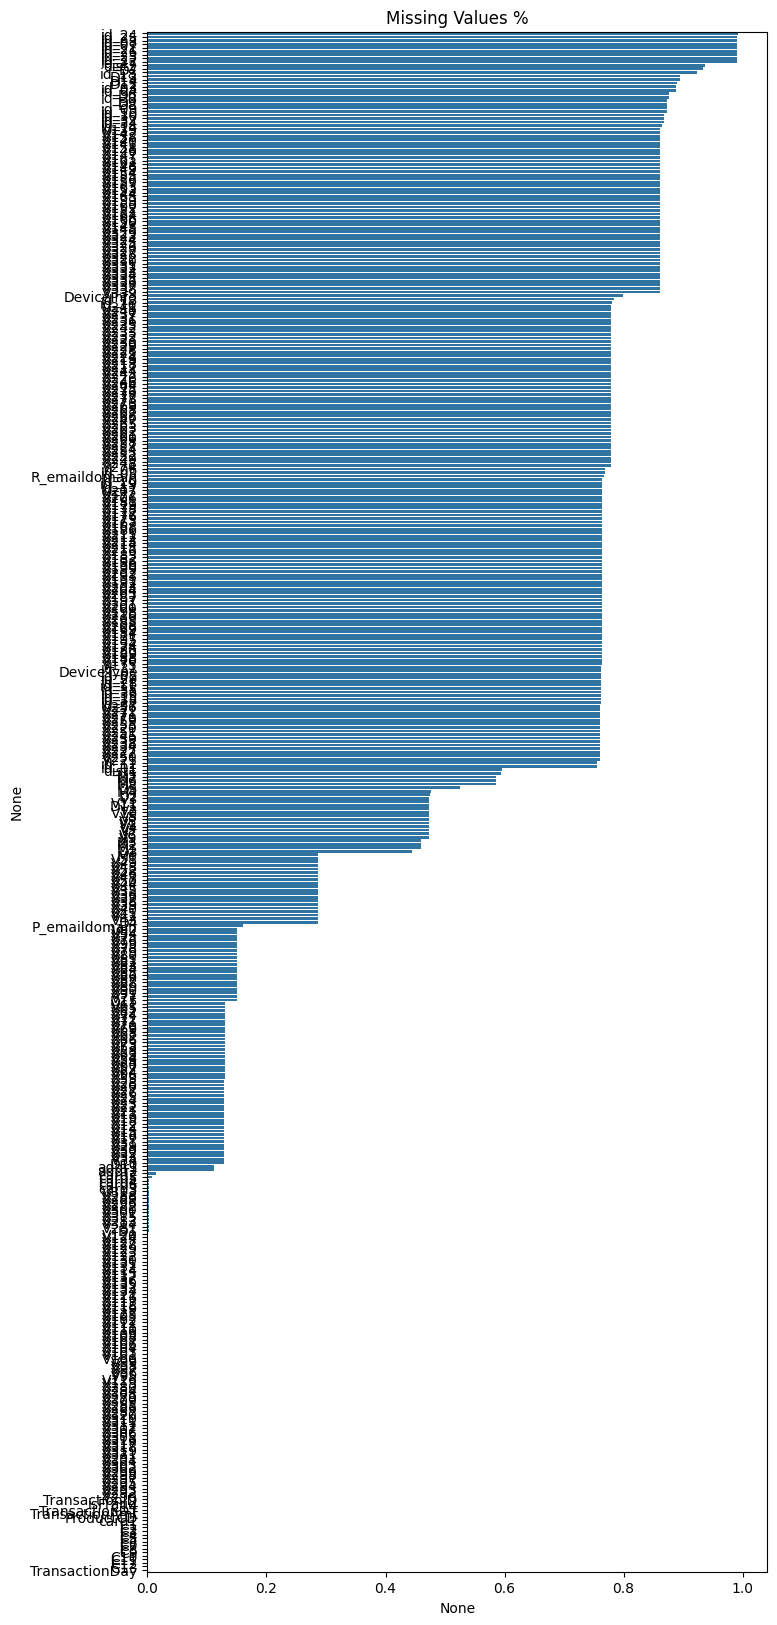

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

missing = df_merged.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(8,20))
sns.barplot(x=missing, y=missing.index)
plt.title('Missing Values %')
plt.show()
